In [27]:
#Importamos las librerias que vamos a necesitar en el proyecto 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Abrimos nuestro archivo para empezar el EDA 
ofis= pd.read_excel(r"C:\Users\cfern\Desktop\ML Noya\idealista oficinas Madrid y Barcelona.xlsx")
ofis . head()


,ad_id,ad_activationdate,ad_price,ad_unitprice,ad_area,ad_latitude,ad_longitude,ad_town,censustract_id,censustract_town_id,...,ad_hasparkingspace,ad_hasswimmingpool,newdevelopment_commercialname,newdevelopment_fromprice,newdevelopment_averageprice,adstats_visits,adstats_sendtofriend,adstats_savedasfavorite,adstats_daysonmarket,adstats_contactsbyemail
0,99199193,2022-10-16,350,17.500000,20,40.438454,-3.691035,Madrid,2.807907e+09,28079,...,0,0,NaN,0,0,8,0.0,0,0,0
1,99197636,2022-10-16,6162,22.571429,273,41.392618,2.168054,Barcelona,8.019021e+08,8019,...,0,0,NaN,0,0,16,0.0,0,0,0
2,99195583,2022-10-15,1750,10.000000,175,41.393879,2.153753,Barcelona,8.019021e+08,8019,...,0,0,NaN,0,0,17,0.0,1,1,0
3,99195197,2022-10-15,950,11.445783,83,40.441447,-3.704765,Madrid,2.807907e+09,28079,...,0,0,NaN,0,0,53,0.0,2,1,0
4,99193877,2022-10-15,1290,9.214286,140,41.393532,2.159704,Barcelona,8.019021e+08,8019,...,0,0,NaN,0,0,42,0.0,0,1,0


In [3]:
#Echamos un vistazo a la informacion que tenemos 
ofis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12747 entries, 0 to 12746
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ad_id                          12747 non-null  int64  
 1   ad_activationdate              12747 non-null  object 
 2   ad_price                       12747 non-null  int64  
 3   ad_unitprice                   12747 non-null  float64
 4   ad_area                        12747 non-null  int64  
 5   ad_latitude                    12747 non-null  float64
 6   ad_longitude                   12747 non-null  float64
 7   ad_town                        12747 non-null  object 
 8   censustract_id                 12746 non-null  float64
 9   censustract_town_id            12747 non-null  int64  
 10  ad_postalcode                  12746 non-null  float64
 11  ad_streettype                  9957 non-null   object 
 12  ad_streetname                  11470 non-null 

In [4]:
#Quitamos duplicados y comprobamos missing 
ofis.drop_duplicates(inplace=True)

In [5]:
#La columna de altura de la oficina , estaba en formato de texto , convertimos en numero y modificamos ciertos datos por su numero para tener columnas numericas 

ofis['ad_floornumber'].replace({"en" :0.5,"ss" :-1,"st" :-0.5,"bj":0}, regex=True, inplace=True)
ofis['ad_floornumber'] = ofis['ad_floornumber'].astype(int)




In [6]:
# Mis datos tiene precios de varios años , me quedo con los mas recientes y no voy a usarlos en la regresion , me quedo con 10279 datos 
ofis['ad_activationdate'] = pd.to_datetime(ofis.ad_activationdate)
mask = (ofis['ad_activationdate'] > '2021-01-1') & (ofis['ad_activationdate'] <= '2023-01-01')
ofis=ofis.loc[mask]
ofis.tail()


,ad_id,ad_activationdate,ad_price,ad_unitprice,ad_area,ad_latitude,ad_longitude,ad_town,censustract_id,censustract_town_id,...,ad_hasparkingspace,ad_hasswimmingpool,newdevelopment_commercialname,newdevelopment_fromprice,newdevelopment_averageprice,adstats_visits,adstats_sendtofriend,adstats_savedasfavorite,adstats_daysonmarket,adstats_contactsbyemail
12740,2215223,2021-03-04,400,33.333333,12,41.395702,2.174209,Barcelona,8.019021e+08,8019,...,0,0,NaN,0,0,4790,15.0,47,591,25
12742,2214567,2022-07-27,2000,14.285714,140,40.429365,-3.663276,Madrid,2.807904e+09,28079,...,1,0,NaN,0,0,1684,7.0,52,81,16
12743,2213040,2021-12-09,760,12.666667,60,41.403330,2.133798,Barcelona,8.019050e+08,8019,...,0,0,NaN,0,0,1253,14.0,40,311,17
12745,2212618,2021-03-23,2700,14.594595,185,40.413855,-3.692010,Madrid,2.807903e+09,28079,...,0,0,NaN,0,0,1818,4.0,10,572,5
12746,2212193,2022-02-16,1400,12.500000,112,40.495819,-3.706806,Madrid,2.807908e+09,28079,...,1,0,NaN,0,0,2678,10.0,43,242,9


In [7]:
#Hacemos 3 grupos de demandas de oficinas por tamaño de la misma y apartir de aqui vamos a :
     #hacer regresiones para averiguar el precio en funcion del tamaño de la oficina y comprobar el score de los modelos en el siguiente notebook 
     
tamaños=[]
for i in ofis["ad_area"]:
    if   i >=30 and i<200:
        tamaños.append(1)
    elif i >=200 and i<800:
         tamaños.append(2)

    elif i >=800 and i <10000:
         tamaños.append(3)
    else :
        tamaños.append(4)
print(tamaños[0:10])
print(len(tamaños))

[4, 2, 1, 1, 1, 2, 2, 1, 1, 2]
10279


In [8]:
ofis["tamaños"]=tamaños

In [9]:
ofis.groupby("tamaños").sum()

,ad_id,ad_price,ad_unitprice,ad_area,ad_latitude,ad_longitude,censustract_id,censustract_town_id,ad_postalcode,ad_streetnumber,...,ad_hasparkingspace,ad_hasswimmingpool,newdevelopment_commercialname,newdevelopment_fromprice,newdevelopment_averageprice,adstats_visits,adstats_sendtofriend,adstats_savedasfavorite,adstats_daysonmarket,adstats_contactsbyemail
tamaños,,,,,,,,,,,,,,,,,,,,,
1,260192855476,4843934,43242.142496,317807,115607.741290,2.348139,4.345206e+12,43451923,43383770.0,72160,...,117,0,0.0,0,0,1095345,1466.0,28648,493065,7538
2,471212833560,38951307,93608.589979,2104893,208825.486051,-5069.561802,9.628687e+12,96286532,96133521.0,110534,...,239,0,0.0,0,0,1559720,743.0,13548,1025998,3193
3,192302996588,64849691,39823.321574,3395105,84514.656530,-3063.843514,4.256517e+12,42564989,42505572.0,42888,...,62,0,0.0,0,0,559837,110.0,1847,384124,388
4,24681356152,3070746,12384.237473,171132,11551.234716,-382.591582,5.671573e+11,5679577,5660852.0,11877,...,8,0,0.0,0,0,210423,272.0,5949,60711,2182


In [10]:
print(ofis["ad_unitprice"][ofis["ad_unitprice"]>100].nunique())
print(ofis["ad_area"][ofis["ad_area"]< 30].nunique())
print(ofis["ad_area"][ofis["ad_area"]> 10000].nunique())

17
21
11


In [11]:
# Tenemos un rango de precios y de areas muy amplios con ouliers que distorsionan la distribución de los datos 
# Los precios/m2 >100€/m los elimino ; que se corresponden con los CP 08019 en Barcelona y 28079 en Madrid , son 17 datos 
# Decidimos eliminar los valores de areas >10.000m (20)y menores de 30 m (11)

ofis = ofis[(ofis["ad_area"] < 10000) & (ofis["ad_area"]>30)&(ofis["ad_unitprice"]<100)]
ofis

,ad_id,ad_activationdate,ad_price,ad_unitprice,ad_area,ad_latitude,ad_longitude,ad_town,censustract_id,censustract_town_id,...,ad_hasswimmingpool,newdevelopment_commercialname,newdevelopment_fromprice,newdevelopment_averageprice,adstats_visits,adstats_sendtofriend,adstats_savedasfavorite,adstats_daysonmarket,adstats_contactsbyemail,tamaños
1,99197636,2022-10-16,6162,22.571429,273,41.392618,2.168054,Barcelona,8.019021e+08,8019,...,0,NaN,0,0,16,0.0,0,0,0,2
2,99195583,2022-10-15,1750,10.000000,175,41.393879,2.153753,Barcelona,8.019021e+08,8019,...,0,NaN,0,0,17,0.0,1,1,0,1
3,99195197,2022-10-15,950,11.445783,83,40.441447,-3.704765,Madrid,2.807907e+09,28079,...,0,NaN,0,0,53,0.0,2,1,0,1
4,99193877,2022-10-15,1290,9.214286,140,41.393532,2.159704,Barcelona,8.019021e+08,8019,...,0,NaN,0,0,42,0.0,0,1,0,1
5,99174955,2022-10-15,4000,6.451613,620,41.398043,2.174597,Barcelona,8.019021e+08,8019,...,0,NaN,0,0,23,0.0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12738,2177253,2022-09-22,3000,12.711864,236,40.451402,-3.695075,Madrid,2.807906e+09,28079,...,0,NaN,0,0,1052,3.0,7,24,11,2
12742,2214567,2022-07-27,2000,14.285714,140,40.429365,-3.663276,Madrid,2.807904e+09,28079,...,0,NaN,0,0,1684,7.0,52,81,16,1
12743,2213040,2021-12-09,760,12.666667,60,41.403330,2.133798,Barcelona,8.019050e+08,8019,...,0,NaN,0,0,1253,14.0,40,311,17,1
12745,2212618,2021-03-23,2700,14.594595,185,40.413855,-3.692010,Madrid,2.807903e+09,28079,...,0,NaN,0,0,1818,4.0,10,572,5,1


In [12]:
# Voy a separar los datos de Madrid y de Barcelona 
ofisM =ofis[ofis["ad_town" ]=="Madrid"]
ofisB=ofis[ofis["ad_town" ]=="Barcelona"]

In [13]:
ofisM.columns

Index(['ad_id', 'ad_activationdate', 'ad_price', 'ad_unitprice', 'ad_area',
       'ad_latitude', 'ad_longitude', 'ad_town', 'censustract_id',
       'censustract_town_id', 'ad_postalcode', 'ad_streettype',
       'ad_streetname', 'ad_streetnumber', 'ad_floornumber',
       'ad_addressvisible', 'ad_roomnumber', 'ad_bathnumber',
       'ad_flatlocation', 'ad_haslift', 'ad_hasparkingspace',
       'ad_hasswimmingpool', 'newdevelopment_commercialname',
       'newdevelopment_fromprice', 'newdevelopment_averageprice',
       'adstats_visits', 'adstats_sendtofriend', 'adstats_savedasfavorite',
       'adstats_daysonmarket', 'adstats_contactsbyemail', 'tamaños'],
      dtype='object')

In [14]:
# elimino las columnas que son son identificadores , que son relaciones de las otras o que son redundantes por localizacion para MD
ofisM.drop(["ad_activationdate",'ad_unitprice',"ad_id","ad_town","ad_streetname",
                 'ad_streetnumber','ad_hasswimmingpool','censustract_town_id', 'ad_flatlocation','ad_streettype','ad_roomnumber',
                   'ad_addressvisible','adstats_visits',"adstats_sendtofriend","adstats_savedasfavorite","adstats_daysonmarket","adstats_contactsbyemail",'newdevelopment_commercialname',
       'newdevelopment_fromprice', 'newdevelopment_averageprice'],axis=1, inplace=True )

In [15]:
# elimino las columnas que son son identificadores , que son relaciones de las otras o que son redundantes por localizacion para BCN
ofisB.drop(["ad_activationdate",'ad_unitprice',"ad_id","ad_town","ad_streetname",
                 'ad_streetnumber','ad_hasswimmingpool','censustract_town_id', 'ad_flatlocation','ad_streettype','ad_roomnumber',
                   'ad_addressvisible','adstats_visits',"adstats_sendtofriend","adstats_savedasfavorite","adstats_daysonmarket","adstats_contactsbyemail",'newdevelopment_commercialname',
       'newdevelopment_fromprice', 'newdevelopment_averageprice'],axis=1, inplace=True )

In [16]:
ofisB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 1 to 12743
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ad_price            4888 non-null   int64  
 1   ad_area             4888 non-null   int64  
 2   ad_latitude         4888 non-null   float64
 3   ad_longitude        4888 non-null   float64
 4   censustract_id      4888 non-null   float64
 5   ad_postalcode       4888 non-null   float64
 6   ad_floornumber      4888 non-null   int32  
 7   ad_bathnumber       4888 non-null   int64  
 8   ad_haslift          4888 non-null   int64  
 9   ad_hasparkingspace  4888 non-null   int64  
 10  tamaños             4888 non-null   int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 439.2 KB


<Axes: >

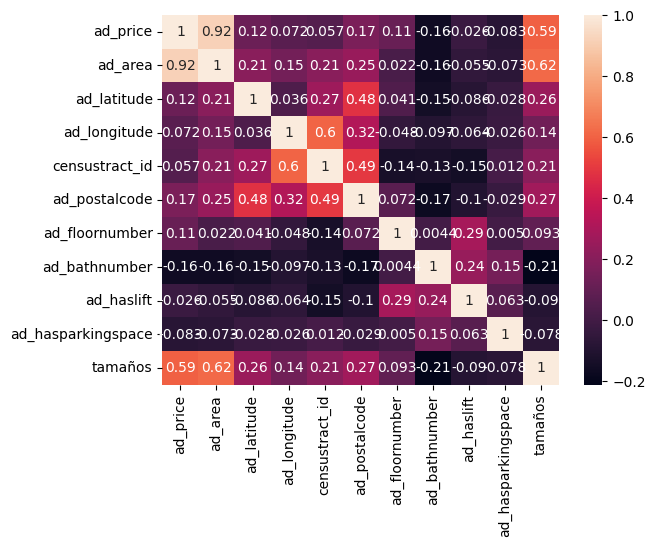

In [17]:
#voy a a mirar la correlacion entre las columnas 
#Pinto las matrices de correlacion de las dos ciudades 

sns.heatmap(ofisM.corr(), annot=True)

<Axes: >

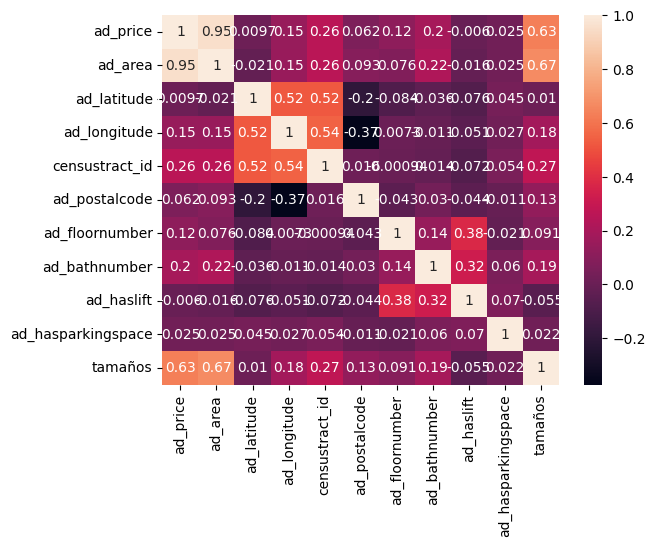

In [18]:
sns.heatmap(ofisB.corr(), annot=True)

In [20]:
ofisM1= ofisM[ofisM["tamaños"]==1]
ofisM2= ofisM[ofisM["tamaños"]==2]
ofisM3= ofisM[ofisM["tamaños"]==3]
ofisB1= ofisB[ofisB["tamaños"]==1]
ofisB2= ofisB[ofisB["tamaños"]==2]
ofisB3= ofisB[ofisB["tamaños"]==3]

Text(0.5, 1.0, 'Precios BCN de oficinas > 800m')

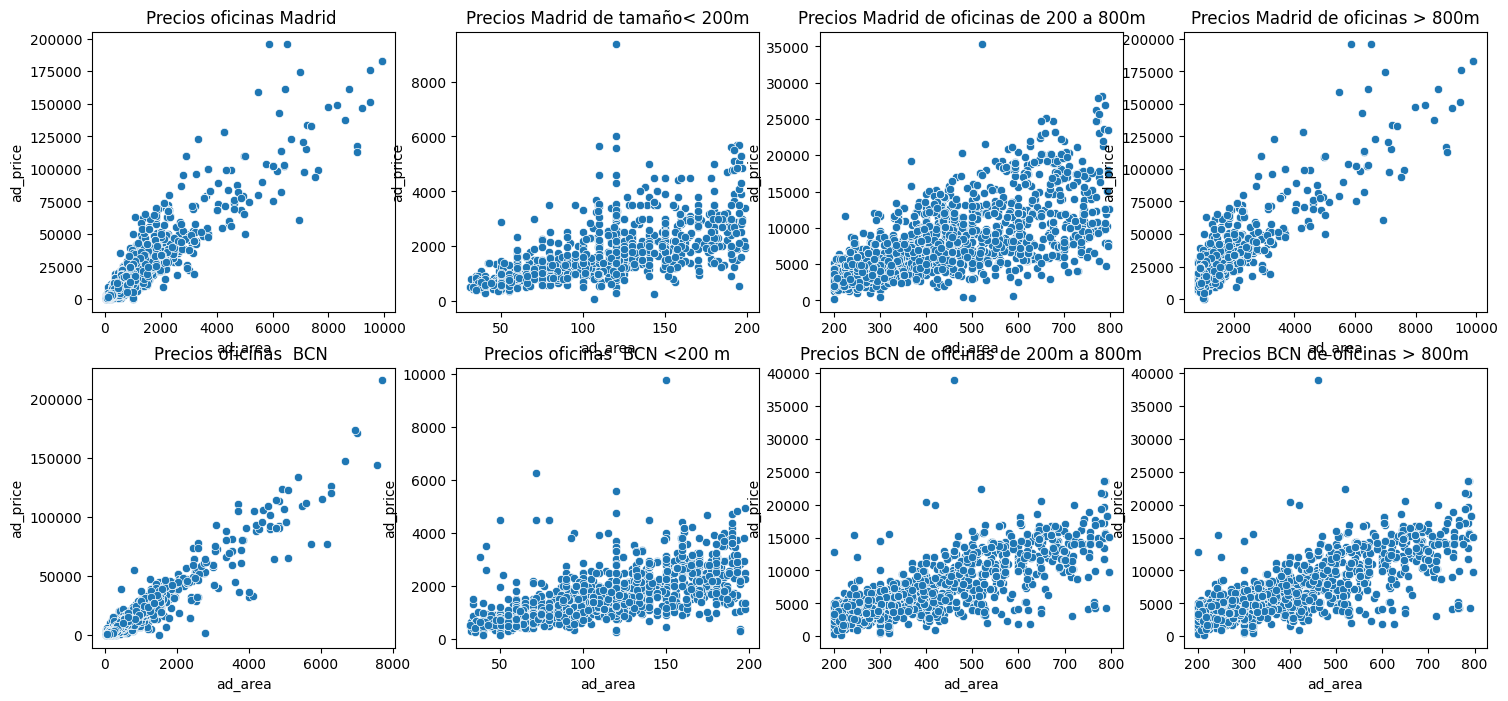

In [21]:
#Pinto mis datos de target en las diferentes tamaños de oficinas y vemos los outliers 
fig, axes = plt.subplots(2, 4, figsize=(18, 8))


sns.scatterplot(y=ofisM["ad_price"] ,x=ofisM["ad_area"],ax=axes[0, 0])
axes[0, 0].set_title("Precios oficinas Madrid ")

sns.scatterplot(y=ofisM1["ad_price"],x=ofisM1["ad_area"],ax=axes[0, 1])
axes[0, 1].set_title("Precios Madrid de tamaño< 200m")

sns.scatterplot(y=ofisM2["ad_price"],x=ofisM2["ad_area"],ax=axes[0, 2])
axes[0, 2].set_title("Precios Madrid de oficinas de 200 a 800m")

sns.scatterplot(y=ofisM3["ad_price"],x=ofisM3["ad_area"],ax=axes[0, 3])
axes[0, 3].set_title("Precios Madrid de oficinas > 800m")

sns.scatterplot(y=ofisB["ad_price"],x=ofisB["ad_area"],ax=axes[1, 0])
axes[1, 0].set_title("Precios oficinas  BCN ")

sns.scatterplot(y=ofisB1["ad_price"],x=ofisB1["ad_area"],ax=axes[1, 1])
axes[1, 1].set_title("Precios oficinas  BCN <200 m")

sns.scatterplot(y=ofisB2["ad_price"],x=ofisB2["ad_area"],ax=axes[1, 2])
axes[1, 2].set_title("Precios BCN de oficinas de 200m a 800m")

sns.scatterplot(y=ofisB2["ad_price"],x=ofisB2["ad_area"],ax=axes[1, 3])
axes[1, 3].set_title("Precios BCN de oficinas > 800m")

Text(0.5, 1.0, 'Precios BCN de oficinas > 800m')

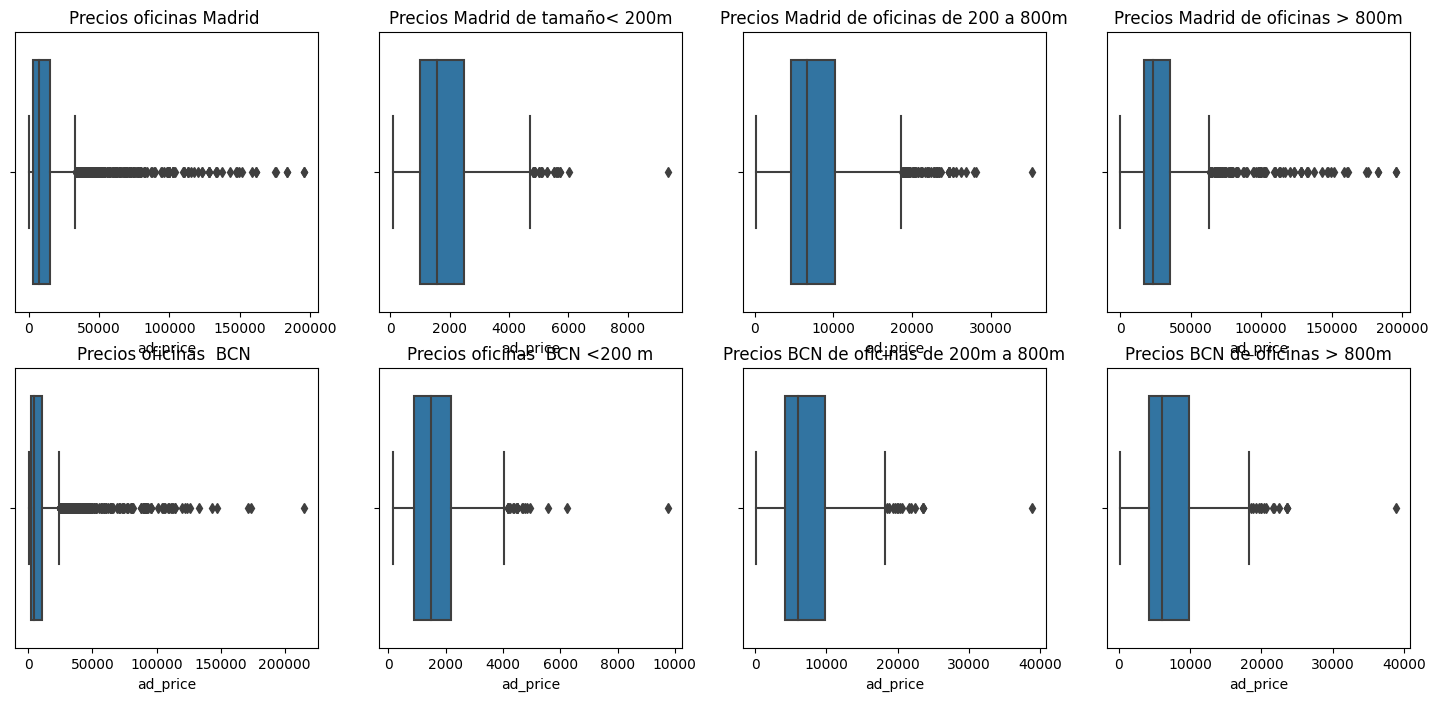

In [28]:
#outliers tamaños de oficinas y vemos los outliers 
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
sns.boxplot(x=ofisM["ad_price"],ax=axes[0, 0])
axes[0, 0].set_title("Precios oficinas Madrid ")

sns.boxplot(x=ofisM1["ad_price"],ax=axes[0, 1])
axes[0, 1].set_title("Precios Madrid de tamaño< 200m")

sns.boxplot(x=ofisM2["ad_price"],ax=axes[0, 2])
axes[0, 2].set_title("Precios Madrid de oficinas de 200 a 800m")

sns.boxplot(x=ofisM3["ad_price"],ax=axes[0, 3])
axes[0, 3].set_title("Precios Madrid de oficinas > 800m")

sns.boxplot(x=ofisB["ad_price"],ax=axes[1, 0])
axes[1, 0].set_title("Precios oficinas  BCN ")

sns.boxplot(x=ofisB1["ad_price"],ax=axes[1, 1])
axes[1, 1].set_title("Precios oficinas  BCN <200 m")

sns.boxplot(x=ofisB2["ad_price"],ax=axes[1, 2])
axes[1, 2].set_title("Precios BCN de oficinas de 200m a 800m")

sns.boxplot(x=ofisB2["ad_price"],ax=axes[1, 3])
axes[1, 3].set_title("Precios BCN de oficinas > 800m")

In [ ]:
#¿Cuales son mis outliers?

def find_anomalies_std(data):
    desv = np.std(data)
    media = np.mean(data)
    cutoff = desv * 3
    lower_limit = media - cutoff
    upper_limit = media + cutoff

    pos = []
    k = 0
    for punto in data:
        if punto > upper_limit or punto < lower_limit:
            pos.append(k)
        k += 1
    return pos 



In [ ]:
#para Madrid detectamos
outliersM = find_anomalies_std(ofisM.ad_price)
outliersM1 = find_anomalies_std(ofisM1.ad_price)
outliersM2 = find_anomalies_std(ofisM2.ad_price)
outliersM3 = find_anomalies_std(ofisM3.ad_price)
print("Anomalias  para oficinas Madrid <200m :",ouliersM1)
print("Anomalias  para oficinas Madrid 200 -400 m :",ouliersM2)
print("Anomalias  para oficinas Madrid >800m :",ouliersM3)
#para BCN detectamos
outliersB = find_anomalies_std(ofisB.ad_price)
outliersB1 = find_anomalies_std(ofisB1.ad_price)
outliersB2 = find_anomalies_std(ofisB2.ad_price)
outliersB3 = find_anomalies_std(ofisB3.ad_price)
print("Anomalias  para oficinas BCN <200m :",ouliersB1)
print("Anomalias  para oficinas BCN 200 -400m :",ouliersB2)
print("Anomalias  para oficinas BCN >800m :",ouliersB3)


Anomalias  para oficinas Madrid <200m : [544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735,

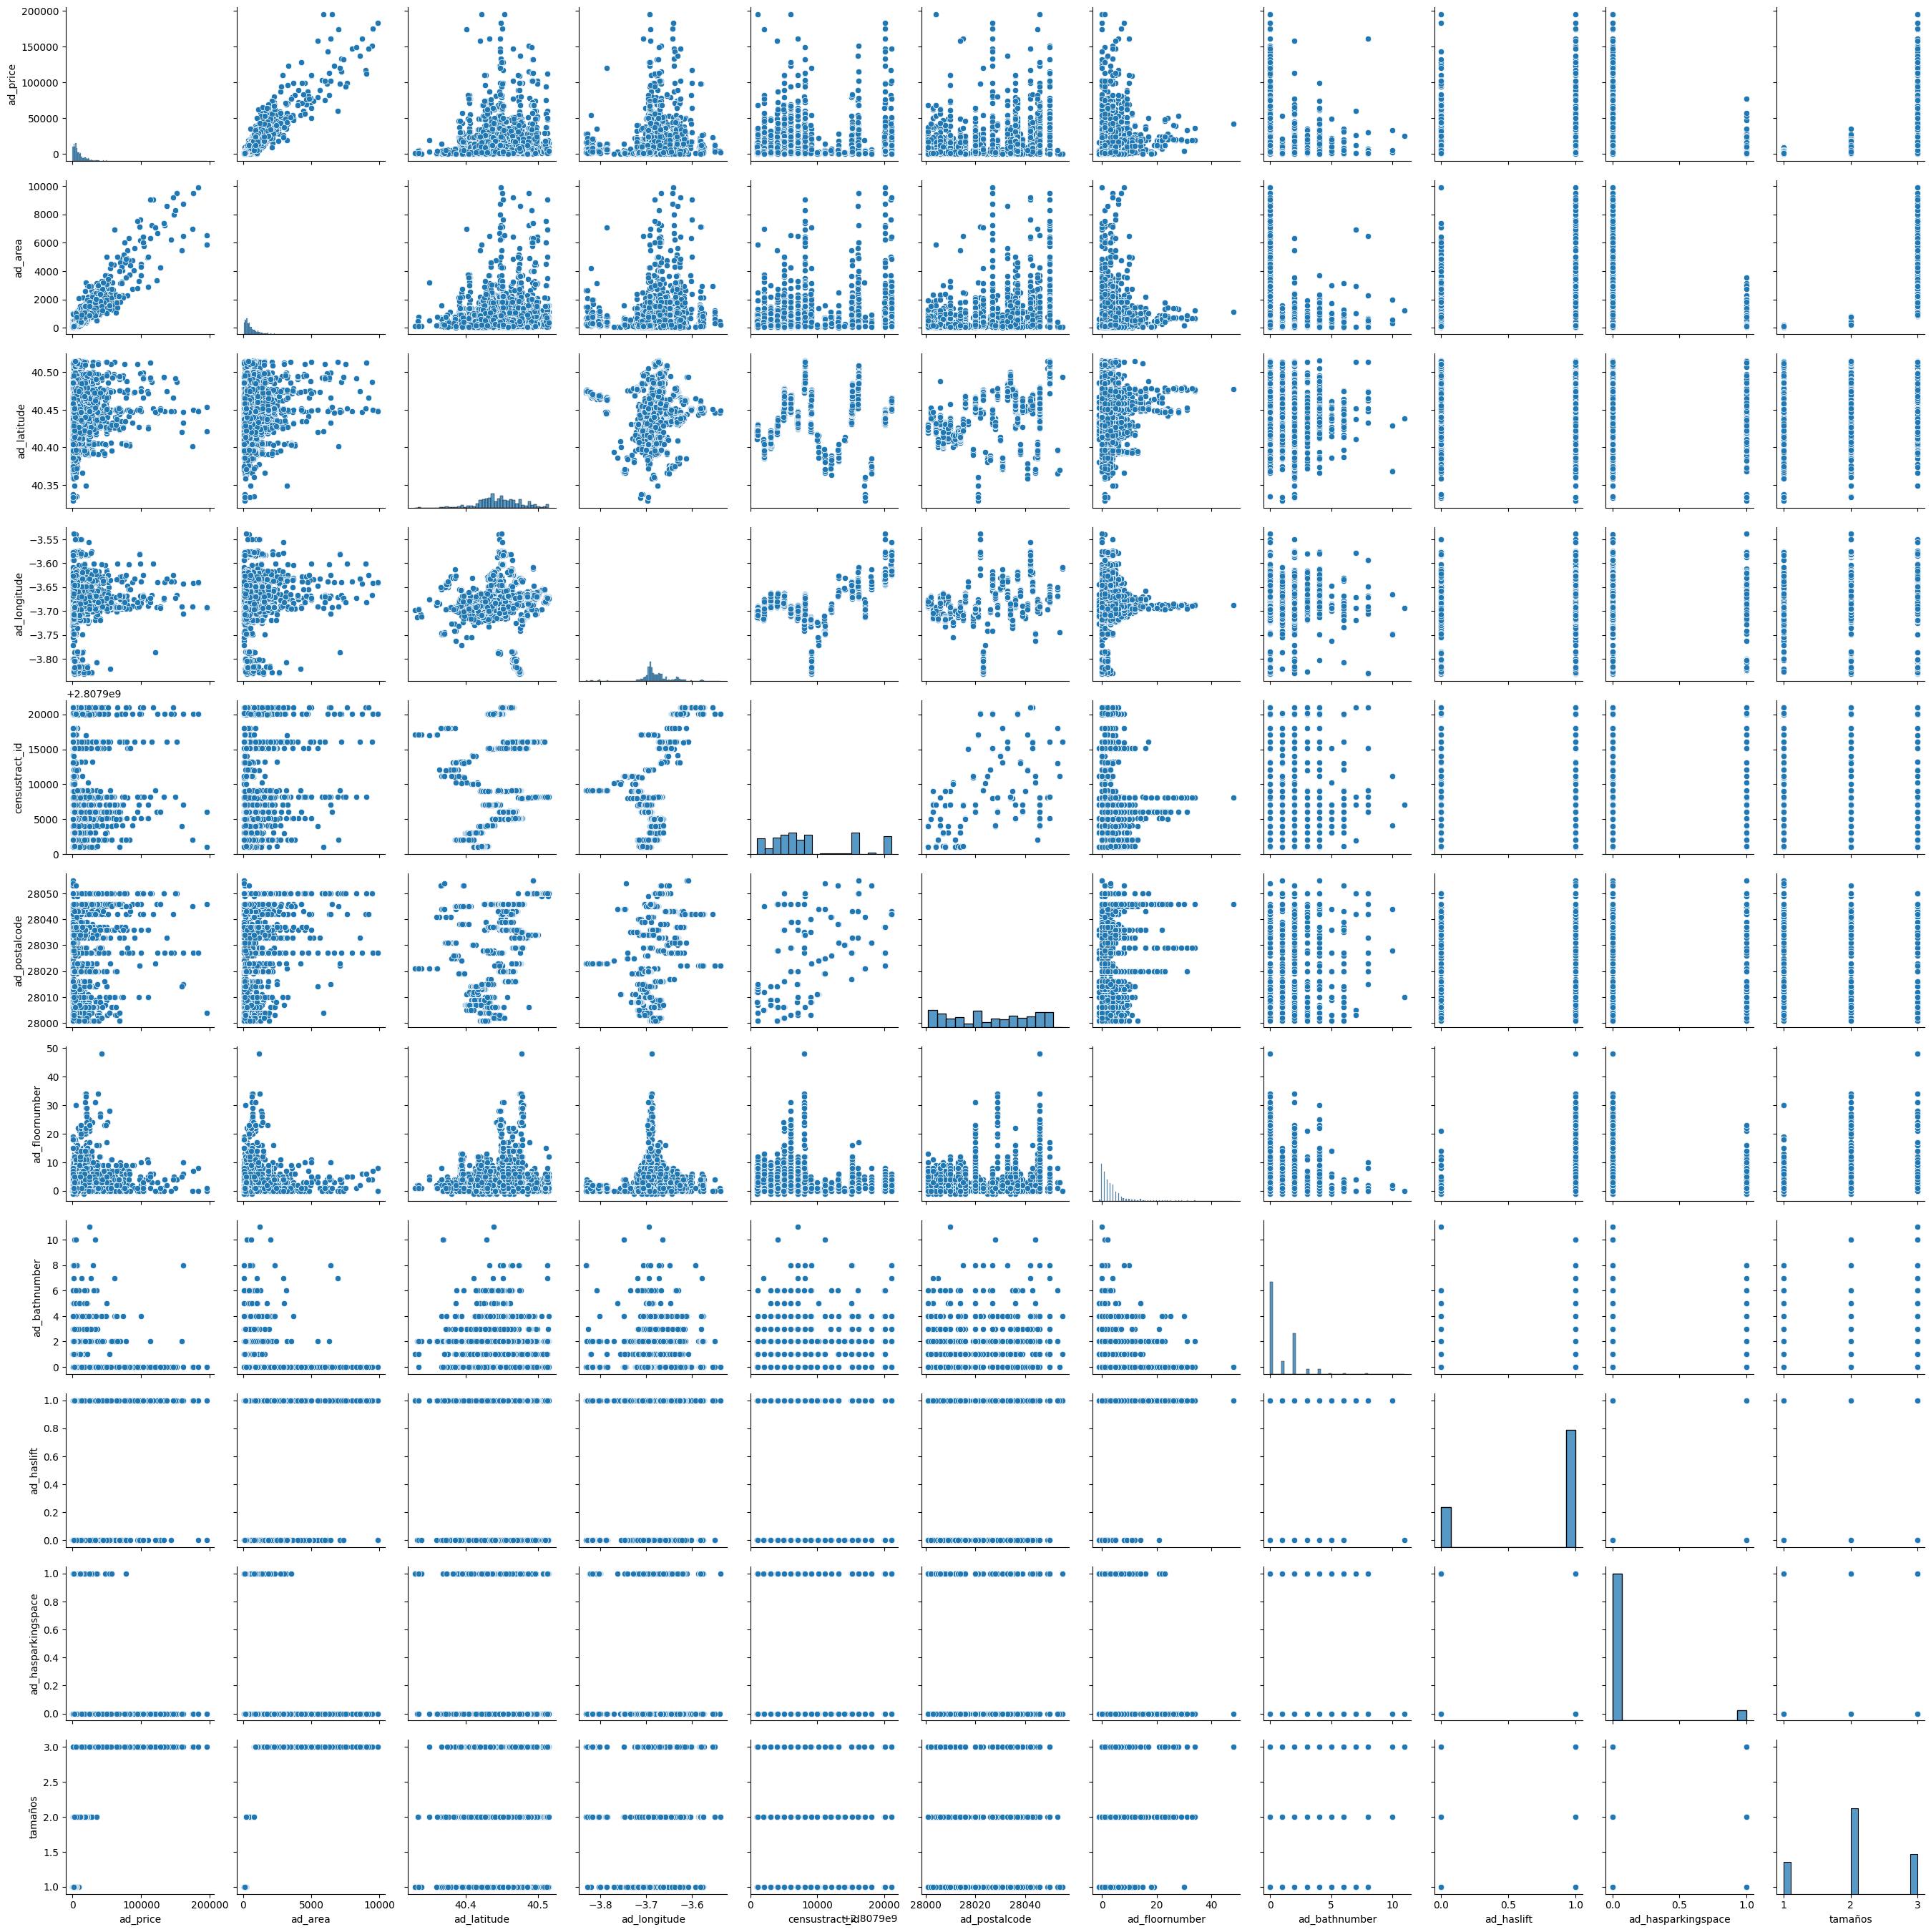

In [ ]:
#  pintamos la relacion dos a dos entre todas las columnas 
sns.pairplot(ofisM)

Text(0.5, 1.0, 'Geolocalizacion de oficinas BCN > 800m ')

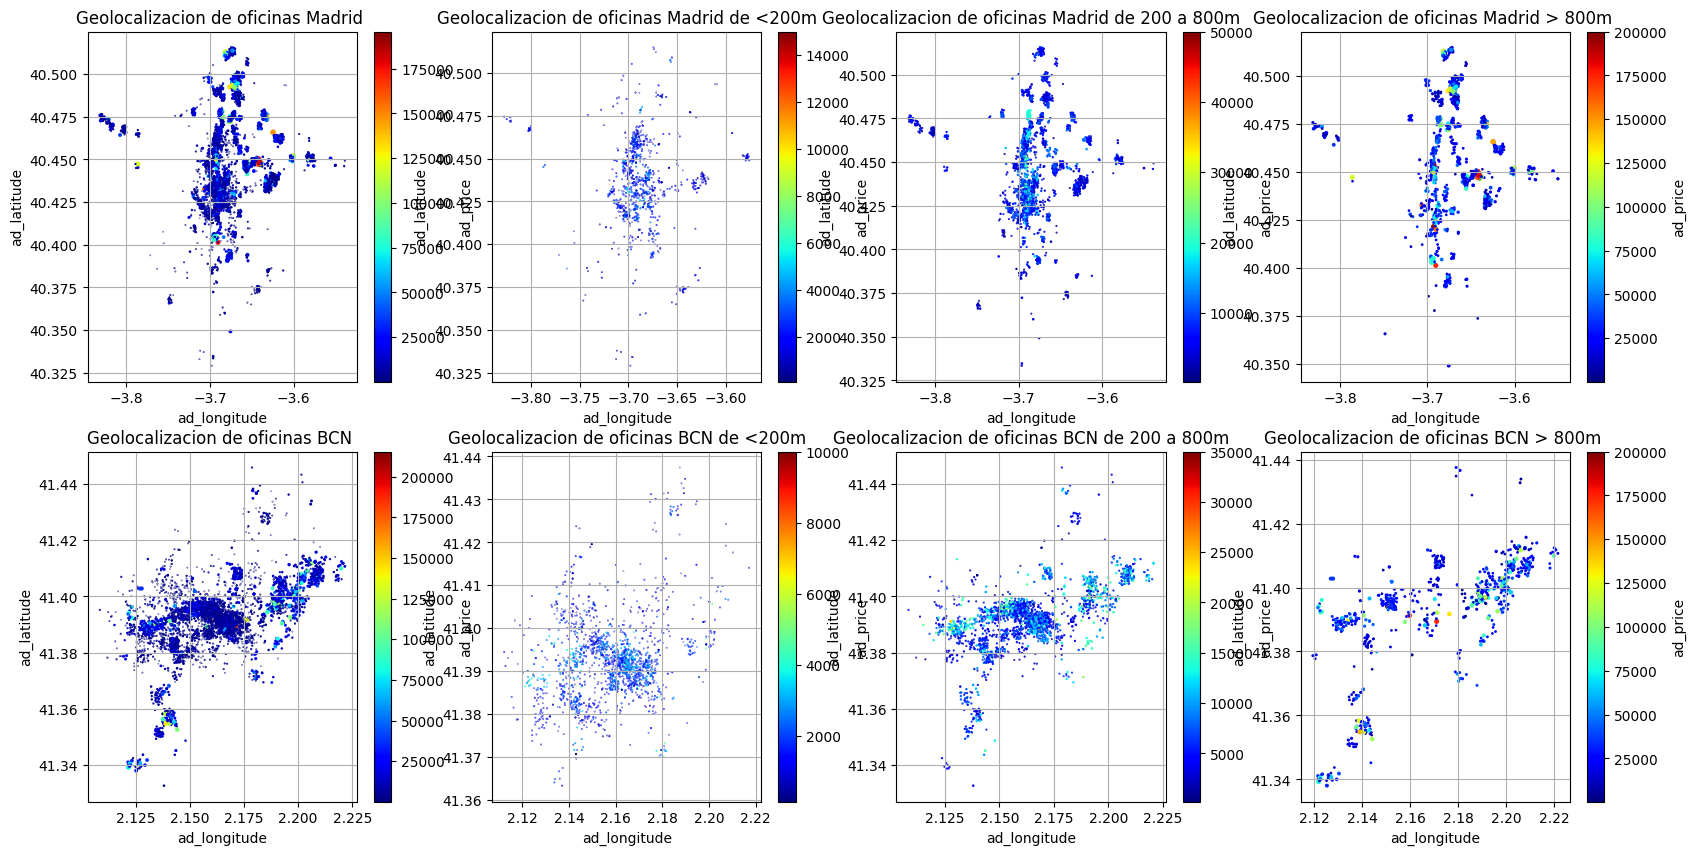

In [ ]:
#Dijujamos con sus coordenadas la distribucion geografica de las oficinas , representamos en escala de color el precio de BARCELONA

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ofisM.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisM["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,legend=True,sharex=False,ax=axes[0, 0])
axes[0, 0].set_title("Geolocalizacion de oficinas Madrid ")
ofisM1.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisM1["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,vmax=15000,legend=True,sharex=False,ax=axes[0, 1])
axes[0, 1].set_title("Geolocalizacion de oficinas Madrid de <200m")
ofisM2.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisM2["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,vmax=50000,legend=True,sharex=False,ax=axes[0, 2])
axes[0, 2].set_title("Geolocalizacion de oficinas Madrid de 200 a 800m")
ofisM3.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisM3["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,vmax=200000,legend=True,sharex=False,ax=axes[0, 3])
axes[0, 3].set_title("Geolocalizacion de oficinas Madrid > 800m ")


ofisB.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisB["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,legend=True,sharex=False,ax=axes[1, 0])
axes[1, 0].set_title("Geolocalizacion de oficinas BCN ")
ofisB1.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisB1["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,vmax=10000,legend=True,sharex=False,ax=axes[1, 1])
axes[1, 1].set_title("Geolocalizacion de oficinas BCN de <200m")
ofisB2.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisB2["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,vmax=35000,legend=True,sharex=False,ax=axes[1, 2])
axes[1, 2].set_title("Geolocalizacion de oficinas BCN de 200 a 800m")
ofisB3.plot(kind="scatter",x="ad_longitude",y="ad_latitude",grid=True,s=ofisB3["ad_area"]/1000,c="ad_price",cmap="jet",colorbar=True,vmax=200000,legend=True,sharex=False,ax=axes[1, 3])
axes[1, 3].set_title("Geolocalizacion de oficinas BCN > 800m ")


In [ ]:
ofisM.to_csv("oficinasMAD.csv")
ofisB.to_csv("oficinasBCN.csv")
ofisM1.to_csv("oficinasMAD1.csv")
ofisM2.to_csv("oficinasMAD2.csv")
ofisM3.to_csv("oficinasMAD3.csv")
ofisB1.to_csv("oficinasBCN1.csv")
ofisB2.to_csv("oficinasBCN2.csv")
ofisB3.to_csv("oficinasBCN3.csv")
